<h1> Question1 </h1>

In [1]:
import numpy as np
import copy

class Matrix:
    def __init__(self, m, n, arr=None):
        self.m = m
        self.n = n
        if arr is None:
            self.arr = np.zeros((m, n))
        else:
            self.arr = arr
    
    def __getitem__(self, key):
        a, b = key
        return self.arr[a, b]

    def __setitem__(self, key, num):
        a, b = key
        self.arr[a, b] = num
    
    def __str__(self):
        s = "The size of matrix is " + str(self.m) + " X " + str(self.n) + "\n"
        for row in self.arr:
            for ele in row:
                s += "{:.8f}".format(ele) + " "
            s += "\n"
        return s
    
    def toEye(self):
        self.arr = np.zeros_like(self.arr)
        for i in range(self.m):
            for j in range(self.n):
                if(i == j):
                    self.arr[i][j] = 1
    
    def toOne(self):
        self.arr = np.ones_like(self.arr)
    
    def randomize(self):
        for i in range(self.m):
            for j in range(self.n):
                self.arr[i][j] = np.random.uniform()
    
    def t(self):
        return Matrix(self.n, self.m, self.arr.T)
    
    def __add__(self, m):
        return Matrix(self.m, self.n, self.arr + m.arr)

    def __sub__(self, m):
        return Matrix(self.m, self.n, self.arr - m.arr)
    
    def __mul__(self, m):
        if type(m) == int or type(m) == float or type(m) == np.float64:
            return Matrix(self.m, self.n, self.arr * m)
        if self.n != m.m:
            raise Exception("Dimension mismatch")
        return Matrix(self.m, m.n, self.arr @ m.arr)
    
    def __rmul__(self, m):
        if type(m) == int or type(m) == float:
            return Matrix(self.m, self.n, self.arr * m)

    def norm(self, p, q = None):
        if q == None:
            q = p
        ans = 0
        for j in range(self.n):
            col_sum = 0
            for i in range(self.m): 
                col_sum += abs(self.arr[i][j]) ** p
            ans += (col_sum)**(q/p)
        ans = ans ** (1/q)
        return ans

    def back_substitution(self, U, y):
        n = U.shape[0]
        x = np.zeros_like(y, dtype=np.double)
        x[-1] = y[-1] / U[-1, -1]

        for i in range(n-2, -1, -1):
            x[i] = (y[i] - np.dot(U[i,i:], x[i:])) / U[i,i]
        return x

    def solvezero(self):
        Q, R = np.linalg.qr(self.arr)
        # since is orthogonal it is invertible
        # solve just Rx = 0
        # backward substitution (R is upper triangular)

        # x is n dimensional
        # we have m equations
        y = np.zeros(self.m)
        x = np.zeros(self.n)
        # Rx = y
        row = self.n-1
        col = self.n-1
        if self.m < self.n:
            # there are infinetly many solutions
            # we will randomly choose n - m values
            rand_values = np.array([i + 99 for i in range(self.n - self.m)], dtype = float)
            x = np.concatenate((np.zeros(self.m), rand_values))
            col = self.n - 1 - (self.n - self.m)
            row = self.m - 1
        else:
            # since here y is zero, this will always lead to x = 0
            x[row] = y[row] / R[row, row]
            row -= 1
            col -= 1

        while col >= 0:
            x[col] = (y[row] - np.dot(R[row, col+1:], x[col+1:]) ) / R[col, col]
            col -= 1
            row -= 1
        
        return x
    
    '''power method (only for square matrices)'''
    def dominantEigen(self):
        num_iterations = 1000
        bk = Matrix(self.n, 1)
        bk.randomize()
        for _ in range(num_iterations):
            zk = self * bk 
            bk =  zk * (1/zk.norm(2))
        eigen_vector = bk
        eigen_value = (bk.t() * self * bk).arr[0] / (bk.t() * bk).arr[0]
        return eigen_value[0], eigen_vector
    
    '''Square symmetic matrices'''
    def deflate(self):
        B = copy.deepcopy(self)
        lambdas = []
        eigen_vectors = []
        for _ in range(self.n):
            lambdai, vi = B.dominantEigen()
            B = B - lambdai * vi * vi.t()
            lambdas.append(lambdai)
            eigen_vectors.append(vi.arr)
        eigen_vectors = np.concatenate(eigen_vectors, axis=1)
        eigen_vectors = Matrix(self.n, self.n, np.array(eigen_vectors))
        eigen_vectors 
        return Matrix(len(lambdas), 1, [np.array(lambdas), ]), eigen_vectors
    
    '''4th question'''
    def qreig(self):
        Ai = copy.deepcopy(self)
        iterations = 1000
        for _ in range(iterations):
            Qi, Ri = np.linalg.qr(Ai.arr)
            Qi = Matrix(Qi.shape[0], Qi.shape[1], Qi)
            Ai = Qi.t() * Ai * Qi
        # print(Ai)
        eigen_values = []
        for i in range(Ai.n):
            for j in range(Ai.n):
                if i == j:
                    eigen_values.append([Ai.arr[i][j], ])
        
        eigen_vectors = []
        for row in eigen_values:
            e = row[0]
            A = copy.deepcopy(self.arr)
            for i in range(self.n):
                for j in range(self.n):
                    if i == j:
                        A[i][j] -= e
            x = np.linalg.solve(A, np.array(eigen_values)) # finding eigen vector
            li = []
            for row in x:
                for ele in row:
                    li.append(ele)
            l2_norm = 0
            for ele in li:
                l2_norm += ele**2
            l2_norm = (l2_norm)**(1/2)

            for i in range(len(li)):
                li[i] /= l2_norm
            
            eigen_vectors.append(li)
            
        eigen_vectors = np.array(eigen_vectors)
        eigen_vectors = Matrix(self.n, self.n, eigen_vectors)
        eigen_vectors = eigen_vectors.t()

        eigen_values = Matrix(len(eigen_values[0]), 1, np.array(eigen_values))
        return eigen_values, eigen_vectors

In [2]:
m = Matrix(4, 4); 
m.randomize(); 
m = m + m.t()
e, v = m.qreig()
print(m)

print("Eigen values")
print(e)

print("Eigen vectors")
print(v) # v[:,i] is the eigenvector for eigenvalue e[i,0]

print("Solver")
print(np.linalg.eig(m.arr))

The size of matrix is 4 X 4
0.50572808 0.94063273 0.75954424 0.98277504 
0.94063273 1.69421758 1.77478525 1.23467805 
0.75954424 1.77478525 1.81388237 0.74899586 
0.98277504 1.23467805 0.74899586 1.37312927 

Eigen values
The size of matrix is 1 X 1
4.76594149 
0.92896123 
-0.19184091 
-0.11610452 

Eigen vectors
The size of matrix is 4 X 4
-0.33740918 0.30054030 0.61191490 0.64914615 
-0.60819191 -0.13201690 0.42605551 -0.65662078 
-0.56506166 -0.60627426 -0.41362874 0.37689270 
-0.44380510 0.72434701 -0.52244437 -0.07355490 

Solver
EigResult(eigenvalues=array([ 4.76594149,  0.92896123, -0.19184091, -0.11610452]), eigenvectors=array([[ 0.33740918,  0.3005403 ,  0.6119149 ,  0.64914615],
       [ 0.60819191, -0.1320169 ,  0.42605551, -0.65662078],
       [ 0.56506166, -0.60627426, -0.41362874,  0.3768927 ],
       [ 0.4438051 ,  0.72434701, -0.52244437, -0.0735549 ]]))


In [3]:
v.arr

array([[-0.33740918,  0.3005403 ,  0.6119149 ,  0.64914615],
       [-0.60819191, -0.1320169 ,  0.42605551, -0.65662078],
       [-0.56506166, -0.60627426, -0.41362874,  0.3768927 ],
       [-0.4438051 ,  0.72434701, -0.52244437, -0.0735549 ]])

In [4]:
m = Matrix(4, 4)
m.randomize()
m = m + m.t()
e, v = m.deflate()
print(m)
print(e)
print(v) # v[:,i] is the eigenvector for eigenvalue e[i,0]
print(np.linalg.eig(m.arr))

The size of matrix is 4 X 4
0.82517746 1.63091088 0.14289561 1.25572278 
1.63091088 1.26810000 1.53498894 0.61489367 
0.14289561 1.53498894 0.12375057 1.48062255 
1.25572278 0.61489367 1.48062255 0.18916947 

The size of matrix is 4 X 1
4.04134498 -2.05403363 0.39404216 0.02484399 

The size of matrix is 4 X 4
0.50107470 -0.42611413 -0.67728275 0.32960426 
0.62336416 0.39357441 -0.11079757 -0.66651347 
0.42336192 -0.61364850 0.66208258 -0.07646483 
0.42556545 0.53568783 0.30109573 0.66428455 

EigResult(eigenvalues=array([ 4.04134498, -2.05403363,  0.39404216,  0.02484399]), eigenvectors=array([[ 0.5010747 ,  0.42611413, -0.67728275,  0.32960426],
       [ 0.62336416, -0.39357441, -0.11079757, -0.66651347],
       [ 0.42336192,  0.6136485 ,  0.66208258, -0.07646483],
       [ 0.42556545, -0.53568783,  0.30109573,  0.66428455]]))


In [5]:
v.arr

array([[ 0.5010747 , -0.42611413, -0.67728275,  0.32960426],
       [ 0.62336416,  0.39357441, -0.11079757, -0.66651347],
       [ 0.42336192, -0.6136485 ,  0.66208258, -0.07646483],
       [ 0.42556545,  0.53568783,  0.30109573,  0.66428455]])

In [6]:
m = Matrix(3, 3)
for i in range(3):
    for j in range(3):
        m[i, j] = (i+1) ** (j+1)
print(m)
e, v = m.dominantEigen()
print(e); print(v)

The size of matrix is 3 X 3
1.00000000 1.00000000 1.00000000 
2.00000000 4.00000000 8.00000000 
3.00000000 9.00000000 27.00000000 

29.942767464139482
The size of matrix is 3 X 1
0.04323030 
0.29744472 
0.95375981 



In [7]:
m = Matrix(4, 2)
for i in range(4):
    for j in range(2):
        m[i, j] = (i+1) ** (j+1)
print(m); 
print(m.solvezero())

The size of matrix is 4 X 2
1.00000000 1.00000000 
2.00000000 4.00000000 
3.00000000 9.00000000 
4.00000000 16.00000000 

[-0.  0.]


In [8]:
m = Matrix(2, 3)
for i in range(2):
    for j in range(3):
        m[i, j] = (i+1) + (j+1)
print(m); 
print(m.solvezero())

The size of matrix is 2 X 3
2.00000000 3.00000000 4.00000000 
3.00000000 4.00000000 5.00000000 

[  99. -198.   99.]


In [9]:
m = Matrix(3, 3)
for i in range(3):
    for j in range(3):
        m[i, j] = (i+1) ** (j+1)
print(m); print(m.solvezero())

The size of matrix is 3 X 3
1.00000000 1.00000000 1.00000000 
2.00000000 4.00000000 8.00000000 
3.00000000 9.00000000 27.00000000 

[-0.  0. -0.]


In [10]:
m = Matrix(3, 4)
m[1, 1] = 2
print(m[2, 3])
print(m)

0.0
The size of matrix is 3 X 4
0.00000000 0.00000000 0.00000000 0.00000000 
0.00000000 2.00000000 0.00000000 0.00000000 
0.00000000 0.00000000 0.00000000 0.00000000 



In [11]:
a = 2.0
print("{:.8f}".format(a))

2.00000000


In [12]:
m = Matrix(3, 4); m.toEye(); print(m)
m = Matrix(4, 3); m.toEye(); print(m)

The size of matrix is 3 X 4
1.00000000 0.00000000 0.00000000 0.00000000 
0.00000000 1.00000000 0.00000000 0.00000000 
0.00000000 0.00000000 1.00000000 0.00000000 

The size of matrix is 4 X 3
1.00000000 0.00000000 0.00000000 
0.00000000 1.00000000 0.00000000 
0.00000000 0.00000000 1.00000000 
0.00000000 0.00000000 0.00000000 



In [13]:
m = Matrix(3, 4); m.toOne(); print(m)

The size of matrix is 3 X 4
1.00000000 1.00000000 1.00000000 1.00000000 
1.00000000 1.00000000 1.00000000 1.00000000 
1.00000000 1.00000000 1.00000000 1.00000000 



In [14]:
m = Matrix(2, 3); m.randomize(); print(m)

The size of matrix is 2 X 3
0.82128630 0.01181275 0.97545936 
0.94273810 0.94292009 0.13209033 



In [15]:
m = Matrix(2, 3); m.randomize()
print(m); print(m.t())

The size of matrix is 2 X 3
0.76110889 0.56048129 0.22754308 
0.42994568 0.79515489 0.78534810 

The size of matrix is 3 X 2
0.76110889 0.42994568 
0.56048129 0.79515489 
0.22754308 0.78534810 



In [16]:
m1 = Matrix(2, 3); m1.randomize(); print(m1)
m2 = Matrix(3, 2); m2.randomize(); print(m2)
print(m1 + m2.t()); 
print(m2.t() - m1); 
print(m1 * m2); 
print(m1 * m2.t())

The size of matrix is 2 X 3
0.91999454 0.47994286 0.52404377 
0.98405144 0.45833074 0.05998920 

The size of matrix is 3 X 2
0.40838329 0.58914419 
0.66171050 0.17745206 
0.53458243 0.04889062 

The size of matrix is 2 X 3
1.32837783 1.14165336 1.05862620 
1.57319563 0.63578280 0.10887982 

The size of matrix is 2 X 3
-0.51161125 0.18176764 0.01053866 
-0.39490725 -0.28087868 -0.01109858 

The size of matrix is 2 X 2
0.97343821 0.65279711 
0.73722160 0.66401283 



Exception: Dimension mismatch

In [ ]:
m = Matrix(2, 3); m.randomize(); print(m)
m = 2.0 * m; print(m)
m = m * 3.0; print(m)

The size of matrix is 2 X 3
0.84413253 0.76883338 0.14328023 
0.38500752 0.24567273 0.71677347 

The size of matrix is 2 X 3
1.68826506 1.53766675 0.28656045 
0.77001503 0.49134545 1.43354694 

The size of matrix is 2 X 3
5.06479517 4.61300025 0.85968135 
2.31004510 1.47403636 4.30064082 



In [17]:
import math
m = Matrix(2, 3); m.randomize(); print(m)
print(m.norm(1))
print(m.norm(2))
print(m.norm(math.inf))

The size of matrix is 2 X 3
0.91939058 0.12162497 0.94684620 
0.28889613 0.77575259 0.08826664 

3.1407770978363456
1.5651304873782435
1.0


In [18]:
arr = np.array(
    [
        [0.69907995, 0.74917486, 0.91068809],
        [0.94984428, 0.65229157, 0.40772897]
    ]
)
m = Matrix(2, 3, arr)
print(m)
print(m.norm(1))
print(m.norm(2))
print(m.norm(math.inf))

The size of matrix is 2 X 3
0.69907995 0.74917486 0.91068809 
0.94984428 0.65229157 0.40772897 

4.36880772
1.8366436524636223
1.0


__________

<h1> Question 2 </h1>

In [39]:

# isConnected is added to Undirected Graph
import matplotlib.pyplot as plt
import queue
import copy
import networkx as nx

class DirectedGraph:

    def __init__(self, n = float('inf')):
        self.n = n                              # Number of vertices of a graph V = {1, 2, 3 .., n}
        self.m = 0
        self.out_edges = dict()
        self.in_edges = dict()
        if n != float('inf'):
            for i in range(1, n+1):
                self.out_edges[i] = []
                self.in_edges[i] = []
        self.graph = nx.DiGraph()
    
    def addNode(self, u):
        if u >= 1 and u <= self.n :
            if self.out_edges.get(u) != None:
                # The node is already present
                pass
            else:
                self.n += 1
                self.out_edges[u] = []
                self.in_edges[u] = []
            return
        # Out of bounds
        if u > self.n:
            raise Exception("Node index cannot exceed number of nodes")
        raise Exception("Node index cannot be less than 1")
    
    def addEdge(self, u, v):
        self.addNode(u)
        self.addNode(v)
        
        self.m += 1
        self.out_edges[u].append(v)
        self.in_edges[v].append(u)
        self.graph.add_edge(u, v)
    
    def pagerank(self, alpha):
        page_rank = dict()
        for u in list(self.out_edges.keys()):
            page_rank[u] = 1/self.n
    
        num_iterations = 1000
        for _ in range(num_iterations):
            prev = copy.deepcopy(page_rank)
            for u in list(prev.keys()):
                page_rank[u] = alpha * (sum([prev[v]/len(self.out_edges[v]) for v in self.in_edges[u]])) + (1-alpha)*(1/self.n)
        return page_rank

In [41]:
import numpy as np
p = 0.1; n = 10
g = DirectedGraph(n)
for i in range(n):
    for j in range(n):
        if i != j and np.random.random() <= p:
            g.addEdge(i+1, j+1)

page_rank = g.pagerank(0.85) # function argument is the damping factor
# print(sum(list(page_rank.values())))
page_rank

{1: 0.1943322400388728,
 2: 0.21097910592808555,
 3: 0.026793750000000005,
 4: 0.027750000000000004,
 5: 0.015000000000000003,
 6: 0.027750000000000004,
 7: 0.2155636540330419,
 8: 0.015000000000000003,
 9: 0.015000000000000003,
 10: 0.015000000000000003}

In [42]:
g.in_edges

{1: [2],
 2: [7, 8],
 3: [4],
 4: [5],
 5: [],
 6: [10],
 7: [1, 4, 6],
 8: [],
 9: [],
 10: []}

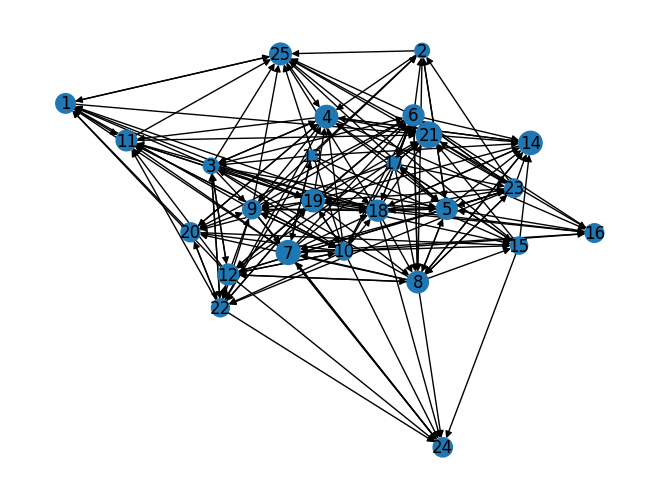

In [43]:
import random

class Graph:
    def __init__(self, n):
        self.n = n
    
    def addEdge(self, u, v):
    
    def pagerank(self, damping_factor):
        pr = nx.pagerank(self.graph, alpha=damping_factor)
        return pr

# Example usage
n = 25  # Number of nodes
p = 0.3  # Probability of adding an edge

# Create a graph
g = Graph(n)

# Add edges randomly
for i in range(n):
    for j in range(n):
        if i != j and random.random() <= p:
            g.addEdge(i+1, j+1)

# Calculate PageRank
pagerank = g.pagerank(0.85)

# Visualize the graph
nx.draw(g.graph, with_labels=True, node_size=[v * 5000 for v in pagerank.values()])
